<a href="https://colab.research.google.com/github/zhouchun0105/credit-card-churners/blob/main/SUBMIT_creditcard_churners_team1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Customer Churn Analysis**

Team 1, Afternoon Session

Ana Maharjan, Ann Lu, Chun Zhou, Phyllis Cao, Yuhan Wang, Zijing Wang

2021/08/26





# **Data Source**

The dataset is from:
LEAPS https://leapsapp.analyttica.com/cases/11

(Data set was created for a case study on LEAPS)

Kaggle URL (for data download):
: https://www.kaggle.com/sakshigoyal7/credit-card-customers

# **Project Objective**

This project investigates the relationship between churn rate and factors such as customer attributes, customer activities, credit card attributes and bank services to determine strategies to hedge customer loss and reduce churn rate.

# **Introduction**

Similar to many other services, banks rely on returning customers in order to be successful. One measure of customer retention is churn rate, which is the rate at which customers stop doing business with an entity. The ability to maintain low churn rates is essential for financial success. With lower churn rates, banks can also reduce customer aquisition cost as well as maintain stable cash flow and market recognition.

#**Preliminary**

## **Description of Data**

This data set provides information on the characteristics of credit card customers, products, and services including demographics, card activities, card features, and service features. It has 21 features and 10128 rows. The detailed feature names and their explanations are shown below:

*CLIENTNUM*: Client number. Unique identifier for the customer holding the account

*Attrition_Flag*: customer activity variable - if the account is closed then 1 else 0

*Customer_Age*: Demographic variable - Customer's Age in Years

*Gender*: Demographic variable - M=Male, F=Female

*Dependent_count*: Demographic variable - Number of dependents

*Education_Level*: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

*Marital_Status*: Demographic variable - Married, Single, Divorced, Unknown

*Income_Category*: Demographic variable - Annual Income Category of the account holder (<  40𝐾,
40
K
,
 40K - 60K,  60𝐾−
60
K
−
 80K,  80𝐾−
80
K
−
 120K, > $120K, Unknown)

*Card_Category*: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

*Months_on_book*: Period of relationship with bank

*Total_Relationship_Count*: Total no. of products held by the customer

*Months_Inactive_12_mon*: No. of months inactive in the last 12 months

*Contacts_Count_12_mon*: No. of Contacts in the last 12 months

*Credit_Limit*: Credit Limit on the Credit Card

*Total_Revolving_Bal*: Total Revolving Balance on the Credit Card

*Avg_Open_To_Buy*: Open to Buy Credit Line (Average of last 12 months)

*Total_Amt_Chng_Q4_Q1*: Change in Transaction Amount (Q4 over Q1)

*Total_Trans_Amt*: Total Transaction Amount (Last 12 months)

*Total_Trans_Ct*: Total Transaction Count (Last 12 months)

*Total_Ct_Chng_Q4_Q1*: Change in Transaction Count (Q4 over Q1)

*Avg_Utilization_Ratio*: Average Card Utilization Ratio

## **Data Preview**

We first connect google colab with the Bigquery dataset. And we also import packages for later use.

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from IPython.display import Image
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

Then we take a preview of the dataset.

(Note: The formatting issue in the output is caused by the Income_Category column due to Github deficiency.)

In [ ]:
%%bigquery --project=ba775-team-project
SELECT *
FROM `ba775-team-project.bankchurners.bankchurners`
LIMIT 10;

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,826077033,Attrited Customer,46,F,2,Unknown,Married,Less than $40K,Blue,42,1,0,4,2002.0,0,2002.0,0.803,2423,39,0.857,0.000,0.984680,0.01532
1,709918158,Existing Customer,43,M,3,High School,Married,$80K - $120K,Blue,23,5,6,1,12315.0,0,12315.0,0.895,2028,51,0.545,0.000,0.000086,0.99991
2,714757908,Existing Customer,46,M,4,Graduate,Married,$120K +,Silver,36,4,1,3,34516.0,1380,33136.0,0.660,2163,56,0.400,0.040,0.000088,0.99991
3,721067658,Existing Customer,40,M,4,Graduate,Married,$60K - $80K,Silver,36,6,1,3,27436.0,642,26794.0,0.705,4051,81,0.761,0.023,0.000088,0.99991
4,826451433,Existing Customer,42,M,4,Graduate,Single,$80K - $120K,Silver,38,2,1,3,34516.0,2273,32243.0,0.860,8502,103,0.717,0.066,0.000088,0.99991
5,708248358,Existing Customer,42,M,4,Graduate,Unknown,$60K - $80K,Silver,30,3,1,3,29937.0,0,29937.0,0.746,14863,109,0.627,0.000,0.000088,0.99991
6,717359208,Existing Customer,57,F,0,College,Married,Less than $40K,Blue,47,2,3,1,4945.0,1779,3166.0,0.536,4037,72,0.756,0.360,0.000091,0.99991
7,710822808,Existing Customer,51,M,0,College,Single,$80K - $120K,Blue,33,1,3,1,34516.0,1228,33288.0,0.747,7854,89,0.648,0.036,0.000091,0.99991
8,818235408,Existing Customer,30,M,0,College,Married,$60K - $80K,Blue,25,2,3,1,19534.0,0,19534.0,0.616,15634,118,0.639,0.000,0.000091,0.99991
9,789334458,Existing Customer,43,F,3,Graduate,Unknown,Unknown,Silver,33,3,1,3,34516.0,1858,32658.0,0.622,4197,67,0.523,0.054,0.000087,0.99991


#**Exploratory Analysis**

### **Question 1: What is the overall churn rate of our customer?**

We want to find the churn rate for all customers regardless of their attributes. 

In [ ]:
%%bigquery churn_rate --project=ba775-team-project
/* churn rate */
SELECT SUM(CAST(Attrition_Flag = 'Attrited Customer' AS INT)) AS closed_account, 
COUNT(Attrition_Flag) AS total_account, 
ROUND(SUM(CAST(Attrition_Flag = 'Attrited Customer' AS INT))/COUNT(Attrition_Flag)*100,2)
AS Churn_rate
FROM `ba775-team-project.bankchurners.bankchurners`
WHERE Attrition_Flag IS NOT NULL;

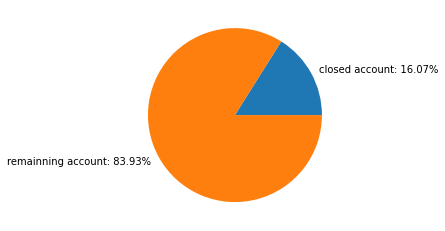

In [ ]:
import matplotlib.pyplot as plt
labels = 'closed account: 16.07%', 'remainning account: 83.93%'
sizes=[1627,10127-1627]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels)
plt.show()

From the 10127 total accounts, 1627 are closed accounts, therefore the churn rate is 16.07%.

Above is a pie chart showcasing the distribution of remaining and closed accounts.

#**Customer Attributes and Churn Rate Analysis**

### **Question 2: What is our user portrait like in terms of age, gender, educational level and income?**

Before we analyze how different features relate with churn rate, we performed a customer portrait analysis to understand our customer base. An overall analysis of our customer demographic demonstrate the following findings:


- Gender distribution: Distribution between male and female is close to equivalent with slightly more females than males

- Product and Gender Breakdown: Females tend to have more blue cards while male clients had the silver, gold and platinum cards

- Education: Majority of our client base have post secondary education (high school graduates) 

- Income: Majority of clients make less than $40,000 per year 

- Marital Status: Half of our client base are divorced, while 33% are single

- Age: Majority of customers are between the ages of 36-55

In [ ]:
Image(filename='/content/A.png', width=450, height=300)

FileNotFoundError: ignored

Most of our customers have graduate degree, followed by the second as high school degree. 

In [ ]:
Image(filename='/content/B.png', width=400, height=300)

Majority of our customers have income lower than 40k, followed by those with income between 40k to 60k.

In [ ]:
Image(filename='/content/C.png', width=400, height=300)

50% of our customers are married, followed by 33.3% as being single.

In [ ]:
Image(filename='/content/D.png', width=400, height=300)

The age distribution of our customer is mostly between 36 to 55 years old.

### **Question 3: What age group of customers has a higher tendency to churn?**

Determining churn rate pattern for different age groups:

According to the table and bar graph shown below, age groups 40-50 and 50-60 have the highest churn rates, which are approximately 17%. Age groups 20-30 and 70-80 have the lowest churn rates, where the rate is 0% for the 70-80 age group and approximately 8.7% for the 20-30 age group.



In [ ]:
%%bigquery age_tendency --project=ba775-team-project
/* age group tendency */
SELECT SUM(CAST(Attrition_Flag = 'Attrited Customer'AS INT)) AS
closed_account,COUNT(*) AS total_account,
SUM(CAST(Attrition_Flag = 'Attrited Customer'AS INT))/COUNT(*)*100 AS Churn_rate,
CASE
      WHEN Customer_Age <10 THEN '0-10'
      WHEN Customer_Age <20 THEN '10-20'
      WHEN Customer_Age <30 THEN '20-30'
      WHEN Customer_Age <40 THEN '30-40'
      WHEN Customer_Age <50 THEN '40-50'
      WHEN Customer_Age <60 THEN '50-60'
      WHEN Customer_Age <70 THEN '60-70'
      ELSE '70-80'
End AS Customer_Age
    
FROM `ba775-team-project.bankchurners.bankchurners`
GROUP BY Customer_Age
ORDER BY Customer_Age

In [ ]:
age_tendency

,closed_account,total_account,Churn_rate,Customer_Age
0,17,195,8.717949,20-30
1,261,1841,14.177078,30-40
2,772,4561,16.926113,40-50
3,506,2998,16.877919,50-60
4,71,530,13.396226,60-70
5,0,2,0.000000,70-80


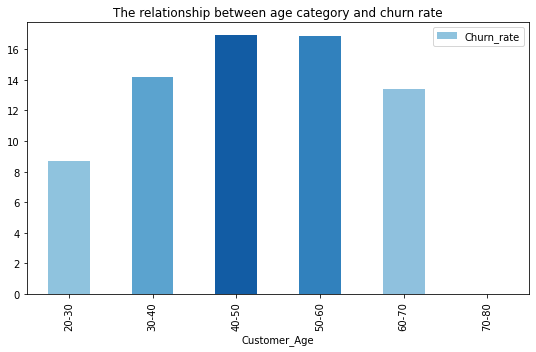

In [ ]:
age_tendency.plot(title = 'The relationship between age category and churn rate',kind='bar', 
                  x='Customer_Age', y='Churn_rate',color = ['#8fc3de', '#5ba3cf','#125ca4','#3181bd','#8fc1de'], figsize=(9, 5));

### **Question 4: How do income and education level influence churn rate?**

The analysis on income and churn rate shows that people with income more than 120,000 or less than 40,000 have the highest churn rates, which are both approximately 17%. Those with income between 60,000 to 80,000 have the lowest churn rates, which is approximately 13.5%.

In [ ]:
%%bigquery Income_Category --project=ba775-team-project
/*income tendency*/
SELECT Income_Category, COUNT(*) AS total_account, 
SUM(CAST(Attrition_Flag = 'Attrited Customer'AS INT)) AS closed_account,
SUM(CAST(Attrition_Flag = 'Attrited Customer'AS INT))/COUNT(*)*100 AS Churn_rate,
FROM `ba775-team-project.bankchurners.bankchurners`
WHERE Income_Category  NOT LIKE 'Unknown'
GROUP BY Income_Category
ORDER BY Income_Category

In [ ]:
Income_Category

,Income_Category,total_account,closed_account,Churn_rate
0,$120K +,727,126,17.331499
1,$40K - $60K,1790,271,15.139665
2,$60K - $80K,1402,189,13.480742
3,$80K - $120K,1535,242,15.765472
4,Less than $40K,3561,612,17.186184


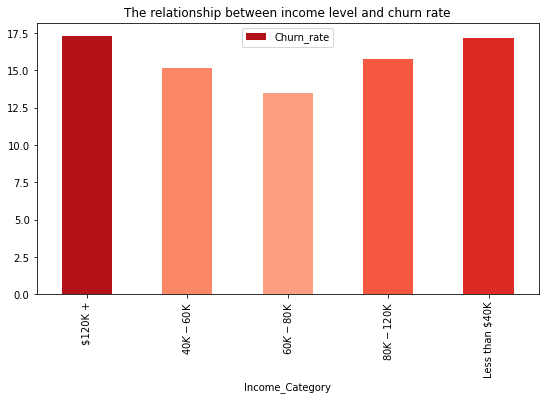

In [ ]:
Income_Category.plot(title = 'The relationship between income level and churn rate',kind='bar', 
                     x='Income_Category', y='Churn_rate',color = ['#b21218','#fc8767', '#fc9e80', '#f6573f','#dc2a25'], figsize=(9, 5));

Among the 6 education levels in the data set, the results show that those with doctorate degrees have the highest churn rate, which is approximately 21%. Additionally, people with high school or college degrees have the lowest churn rates, which are approximately 15.2%.


In [ ]:
%%bigquery Education_Level --project=ba775-team-project
/*educational level tendency*/
SELECT Education_Level, COUNT(*) AS total_account, 
SUM(CAST(Attrition_Flag = 'Attrited Customer' AS INT))
AS closed_account,
SUM(CAST(Attrition_Flag = 'Attrited Customer'AS INT))/COUNT(*)*100 AS Churn_rate,
CASE WHEN Education_Level = 'Uneducated' THEN 0
     WHEN Education_Level = 'High School' THEN 1
     WHEN Education_Level = 'College' THEN 2
     WHEN Education_Level = 'Post-Graduate' THEN 3
     WHEN Education_Level = 'Graduate' THEN 4
     ELSE 5 END AS num_level
FROM `ba775-team-project.bankchurners.bankchurners`
WHERE Education_Level  NOT LIKE 'Unknown'
GROUP BY Education_Level
ORDER BY num_level;

In [ ]:
Education_Level

,Education_Level,total_account,closed_account,Churn_rate,num_level
0,Uneducated,1487,237,15.938130,0
1,High School,2013,306,15.201192,1
2,College,1013,154,15.202369,2
3,Post-Graduate,516,92,17.829457,3
4,Graduate,3128,487,15.569054,4
5,Doctorate,451,95,21.064302,5


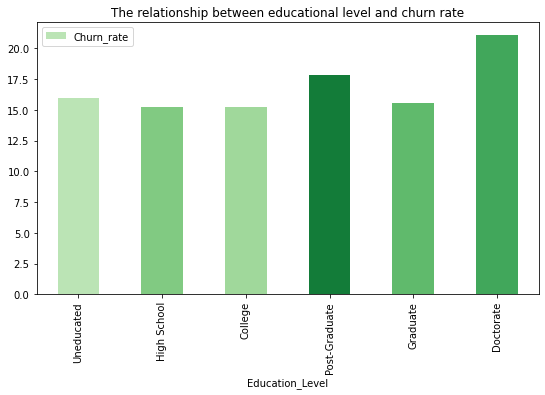

In [ ]:
Education_Level.plot(title = 'The relationship between educational level and churn rate',
                     kind='bar', x='Education_Level', y='Churn_rate',
                     color = ['#bbe4b5','#81ca82','#a0d89b','#137c39','#60ba6c','#41a75b'], figsize=(9, 5));

The customers with doctorate degrees tend to have higher churn rate than those with other education levels. Since income and age may be correlated to customers' education levels, we can also break down the distributions and churn rates for each subgroups.

The analysis below is the breakdown of customers who have doctorate degrees.

The table below shows that for those with Doctorate degrees, the subgroups with the highest churn rates are customers with income between 80k to 120k and between age 30-40, whose churn rate is approximately 33.33%, as well as those with income less than 40k and between age 50-60, whose churn rate is 30%.

In [ ]:
%%bigquery Education_Level_Doctorate2 --project=ba775-team-project
/*educational level Doctorate tendency*/
SELECT COUNT(*) AS total_account, 
SUM(CAST(Attrition_Flag = 'Attrited Customer' AS INT))
AS closed_account, Income_Category,
SUM(CAST(Attrition_Flag = 'Attrited Customer'AS INT))/COUNT(*)*100 AS Churn_rate,
CASE
      WHEN Customer_Age <10 THEN '0-10'
      WHEN Customer_Age <20 THEN '10-20'
      WHEN Customer_Age <30 THEN '20-30'
      WHEN Customer_Age <40 THEN '30-40'
      WHEN Customer_Age <50 THEN '40-50'
      WHEN Customer_Age <60 THEN '50-60'
      WHEN Customer_Age <70 THEN '60-70'
      ELSE '70-80'
End AS Customer_Age
FROM `ba775-team-project.bankchurners.bankchurners`
WHERE Education_Level LIKE 'Doctorate' AND Income_Category NOT LIKE 'Unknown'
GROUP BY Income_Category, Customer_Age
ORDER BY Income_Category, Customer_Age

In [ ]:
Education_Level_Doctorate2

,total_account,closed_account,Income_Category,Churn_rate,Customer_Age
0,5,1,$120K +,20.000000,30-40
1,18,4,$120K +,22.222222,40-50
2,13,3,$120K +,23.076923,50-60
3,1,0,$120K +,0.000000,60-70
4,12,1,$40K - $60K,8.333333,30-40
5,35,8,$40K - $60K,22.857143,40-50
6,16,2,$40K - $60K,12.500000,50-60
7,7,0,$40K - $60K,0.000000,60-70
8,12,0,$60K - $80K,0.000000,30-40
9,29,7,$60K - $80K,24.137931,40-50


# Credit Card Attributes and Churn Rate Analysis

### **Question 5: Which card type of customers has a higher tendency to churn?**

Firstly we calculate the number of customers in different Card_Category to see the contribution of the variable itself.

The result shows that majority of the customers hold Blue card, while the least amount of customers hold Platinum card.

In [ ]:
%%bigquery Card_distribution --project=ba775-team-project
SELECT
Card_Category, 
COUNT(Card_Category) AS Customer_num,
FROM `ba775-team-project.bankchurners.bankchurners`
GROUP BY Card_Category
ORDER BY Customer_num DESC

In [ ]:
Card_distribution

,Card_Category,Customer_num
0,Blue,9436
1,Silver,555
2,Gold,116
3,Platinum,20


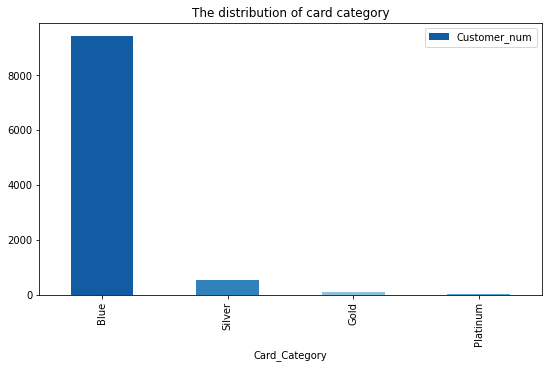

In [ ]:
Card_distribution.plot(title = 'The distribution of card category',kind='bar', 
                       x='Card_Category', y='Customer_num',
                 color = ['#125ca4','#3181bd','#8fc1de','#5ba3cf'], figsize=(9, 5));

Next we evaluate the relationship between churn rate and card type. The table and bar graph show that customers with Platinum card have highest churn rate(25%), while customers with Silver card have the lowest churn rate(14.7%).

In [ ]:
%%bigquery Card_impact --project=ba775-team-project
SELECT
Card_Category, 
COUNT(CLIENTNUM) AS Total_Customer,
SUM(CASE WHEN Attrition_Flag = "Attrited Customer" THEN 1 ELSE 0 END) AS Churn_Customer,
SUM(CASE WHEN Attrition_Flag = "Attrited Customer" THEN 1 ELSE 0 END)/COUNT(CLIENTNUM)*100 AS Churn_Rate
FROM `ba775-team-project.bankchurners.bankchurners`
GROUP BY Card_Category
ORDER BY Total_Customer DESC

In [ ]:
Card_impact

,Card_Category,Total_Customer,Churn_Customer,Churn_Rate
0,Blue,9436,1519,16.097923
1,Silver,555,82,14.774775
2,Gold,116,21,18.103448
3,Platinum,20,5,25.000000


We create graphs to see the tendency. We can see the customers who have higher tier card types have greater probability to churn.

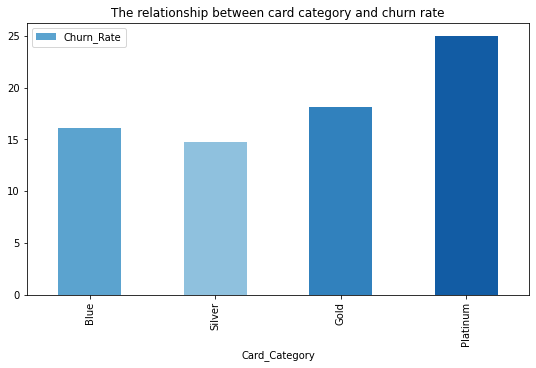

In [ ]:
Card_impact.plot(title = 'The relationship between card category and churn rate',
                 kind='bar', x='Card_Category', y='Churn_Rate',
                 color = ['#5ba3cf','#8fc1de','#3181bd','#125ca4'], figsize=(9, 5));

### **Question 6: Do customers with higher credit limits have lower churn rate?**

Firstly we calculate the number of customers in different Credit_Limit to see the contribution of the variable itself.

The results show that majority of customers have credit limit between 0 - 5000 dollars.

In [ ]:
%%bigquery Credit_distribution --project=ba775-team-project
SELECT
CASE
    WHEN Credit_Limit>=0 AND Credit_Limit <5000 THEN '0-5000'
    WHEN Credit_Limit>=5000 AND Credit_Limit <10000 THEN '05000-10000'
    WHEN Credit_Limit>=10000 AND Credit_Limit <15000 THEN '10000-15000'
    WHEN Credit_Limit>=15000 AND Credit_Limit <20000 THEN '15000-20000'
    WHEN Credit_Limit>=20000 AND Credit_Limit <25000 THEN '20000-25000'
    WHEN Credit_Limit>=25000 AND Credit_Limit <30000 THEN '25000-30000'
    WHEN Credit_Limit>=30000 AND Credit_Limit <35000 THEN '30000-35000'
END as Credit_Limit,
COUNT(Credit_Limit) AS Customer_num,
FROM `ba775-team-project.bankchurners.bankchurners`
GROUP BY Credit_Limit
ORDER BY Credit_Limit

In [ ]:
Credit_distribution

,Credit_Limit,Customer_num
0,0-5000,5358
1,05000-10000,2015
2,10000-15000,941
3,15000-20000,549
4,20000-25000,372
5,25000-30000,225
6,30000-35000,667


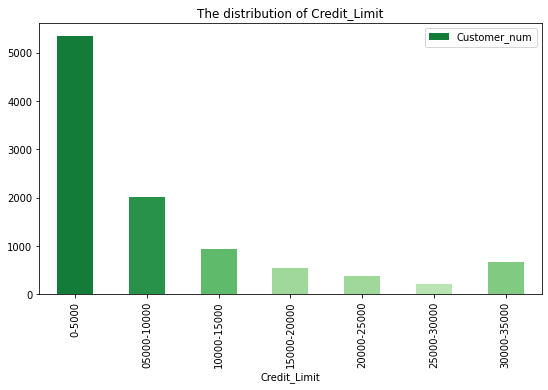

In [ ]:
Credit_distribution.plot(title = 'The distribution of Credit_Limit',kind='bar', x='Credit_Limit', y='Customer_num',
                 color = ['#137c39','#29924a', '#60ba6c','#a0d89b','#a0d89b','#bbe4b5','#81ca82',], figsize=(9, 5));

We divide the number of churned customers by the total number of customers group by the Credit_Limit to see whether the credit limit will affect the churn rate.

As shown in the bar graph, the relationship between credit limit and churn rate doesn't appear to be significant. Therefore, we cannot conclude customer with higher credit limits have lower churn rate.

In [ ]:
%%bigquery Credit_impact --project=ba775-team-project
SELECT
CASE
    WHEN Credit_Limit>=0 AND Credit_Limit <5000 THEN '0-5000'
    WHEN Credit_Limit>=5000 AND Credit_Limit <10000 THEN '05000-10000'
    WHEN Credit_Limit>=10000 AND Credit_Limit <15000 THEN '10000-15000'
    WHEN Credit_Limit>=15000 AND Credit_Limit <20000 THEN '15000-20000'
    WHEN Credit_Limit>=20000 AND Credit_Limit <25000 THEN '20000-25000'
    WHEN Credit_Limit>=25000 AND Credit_Limit <30000 THEN '25000-30000'
    WHEN Credit_Limit>=30000 AND Credit_Limit <35000 THEN '30000-35000'
END as Credit_Limit,
SUM(CAST(Attrition_Flag = 'Attrited Customer' AS INT)) AS Churn_Customer,
COUNT(*) AS Total_Customer,
SUM(CAST(Attrition_Flag = 'Attrited Customer' AS INT))/COUNT(*)*100 AS Churn_Rate

FROM `ba775-team-project.bankchurners.bankchurners`
GROUP BY Credit_Limit
ORDER BY Credit_Limit

In [ ]:
Credit_impact

,Credit_Limit,Churn_Customer,Total_Customer,Churn_Rate
0,0-5000,926,5358,17.282568
1,05000-10000,302,2015,14.987593
2,10000-15000,145,941,15.409139
3,15000-20000,70,549,12.750455
4,20000-25000,43,372,11.559140
5,25000-30000,33,225,14.666667
6,30000-35000,108,667,16.191904


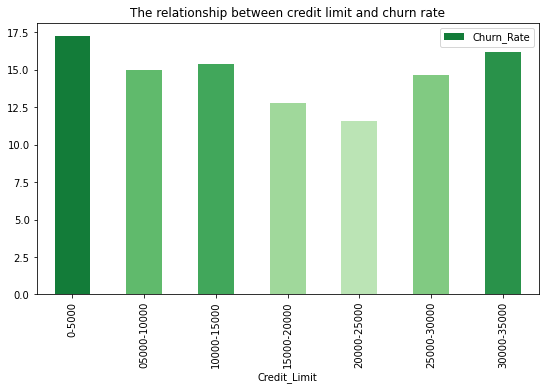

In [ ]:
Credit_impact.plot(title = 'The relationship between credit limit and churn rate', kind='bar', 
                   x='Credit_Limit', y='Churn_Rate', 
                   color = ['#137c39','#60ba6c','#41a75b','#a0d89b','#bbe4b5','#81ca82','#29924a'], figsize=(9, 5));

### **Question 7: Do customers with higher churn rate tend to be contacted more by the bank?**

The distribution of contacts count for the last 12 months is shown belown. The results show that customers tend to be contacted between 2 to 3 times a year. 

In [ ]:
%%bigquery ContactNum_distribution --project=ba775-team-project
SELECT 
CASE
  WHEN Contacts_Count_12_mon=0 THEN 'Contacts_0'
  WHEN Contacts_Count_12_mon=1 THEN 'Contacts_1'
  WHEN Contacts_Count_12_mon=2 THEN 'Contacts_2'
  WHEN Contacts_Count_12_mon=3 THEN 'Contacts_3'
  WHEN Contacts_Count_12_mon=4 THEN 'Contacts_4'
  WHEN Contacts_Count_12_mon=5 THEN 'Contacts_5'
  WHEN Contacts_Count_12_mon=6 THEN 'Contacts_6'
END as Contacts_Count_12_mon,
COUNT(Contacts_Count_12_mon) AS Customer_num,
FROM `ba775-team-project.bankchurners.bankchurners`
GROUP BY Contacts_Count_12_mon
ORDER BY Contacts_Count_12_mon

In [ ]:
ContactNum_distribution

,Contacts_Count_12_mon,Customer_num
0,Contacts_0,399
1,Contacts_1,1499
2,Contacts_2,3227
3,Contacts_3,3380
4,Contacts_4,1392
5,Contacts_5,176
6,Contacts_6,54


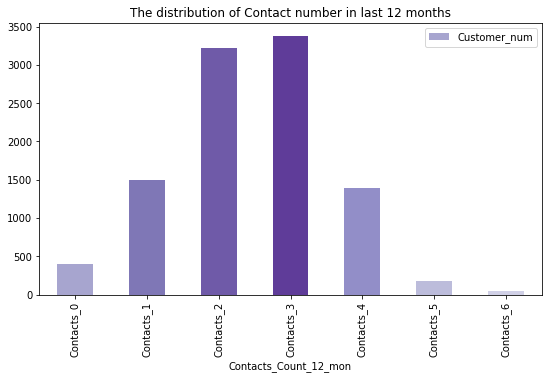

In [ ]:
ContactNum_distribution.plot(title = 'The distribution of Contact number in last 12 months',kind='bar', 
                           x='Contacts_Count_12_mon', y='Customer_num',
                 color = ['#a7a5cf','#7f77b6','#6f5aa8','#5f3c99','#928ec8','#bcbcdb','#d0d0e6'], figsize=(9, 5));

We divide the number of churn customers by the total number of customers group by the Contacts_Count_12_mon to see if there is a relationship between contact counts and churn rate.

The outputs below include a table, a bar graph, and the correlation between contact counts and churn rate.
All outputs show that churn rate is positively correlated to contact counts (correlation = 0.2). Customers with higher contact counts are more likely to churn.

In [ ]:
%%bigquery ContactNum_impact --project=ba775-team-project
SELECT 
CASE
  WHEN Contacts_Count_12_mon=0 THEN 'Contacts_0'
  WHEN Contacts_Count_12_mon=1 THEN 'Contacts_1'
  WHEN Contacts_Count_12_mon=2 THEN 'Contacts_2'
  WHEN Contacts_Count_12_mon=3 THEN 'Contacts_3'
  WHEN Contacts_Count_12_mon=4 THEN 'Contacts_4'
  WHEN Contacts_Count_12_mon=5 THEN 'Contacts_5'
  WHEN Contacts_Count_12_mon=6 THEN 'Contacts_6'
END as Contacts_Count_12_mon,
SUM(CAST(Attrition_flag='Attrited Customer' AS INT)) AS Churn_Customer,
COUNT(*) AS Total_Customer,
SUM(CAST(Attrition_flag='Attrited Customer' AS INT))/COUNT(*)*100 AS Churn_Rate
FROM `ba775-team-project.bankchurners.bankchurners`
GROUP BY Contacts_Count_12_mon
ORDER BY Contacts_Count_12_mon

In [ ]:
ContactNum_impact

,Contacts_Count_12_mon,Churn_Customer,Total_Customer,Churn_Rate
0,Contacts_0,7,399,1.754386
1,Contacts_1,108,1499,7.204803
2,Contacts_2,403,3227,12.488379
3,Contacts_3,681,3380,20.147929
4,Contacts_4,315,1392,22.629310
5,Contacts_5,59,176,33.522727
6,Contacts_6,54,54,100.000000


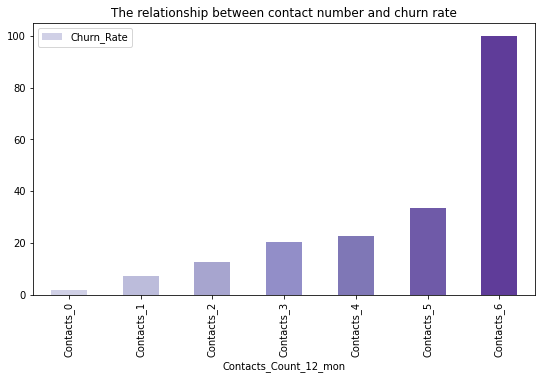

In [ ]:
ContactNum_impact.plot(title = 'The relationship between contact number and churn rate', kind='bar', 
                       x='Contacts_Count_12_mon', y='Churn_Rate', 
                       color = ['#d0d0e6','#bcbcdb','#a7a5cf','#928ec8','#7f77b6','#6f5aa8','#5f3c99'], figsize=(9, 5));

In [ ]:
%%bigquery --project=ba775-team-project
SELECT ((SUM(Contacts_Count_12_mon * attrition_flag)-(SUM(Contacts_Count_12_mon) * SUM(attrition_flag)) / COUNT(*)))
  / (SQRT(SUM(Contacts_Count_12_mon * Contacts_Count_12_mon)-(SUM(Contacts_Count_12_mon) * 
  SUM (Contacts_Count_12_mon)) / COUNT(*) ) * SQRT(SUM(attrition_flag * attrition_flag)
  -(SUM(attrition_flag) * SUM(attrition_flag)) / COUNT(*))) AS corr
FROM 
(
  SELECT
  Contacts_Count_12_mon,
  CAST(Attrition_Flag = 'Attrited Customer' AS INT) AS attrition_flag
  FROM ba775-team-project.bankchurners.bankchurners
)

,corr
0,0.204491


### **Question 8: Are long-term customers less likely to churn overall?**

The distribution of this variable shows that the majority of customers have a months on book value between 30 and 39.

In [ ]:
%%bigquery Month_distribution --project=ba775-team-project
SELECT 
CASE
      WHEN Months_on_Book>=10 AND Months_on_Book <20 then '10-19'
      WHEN Months_on_Book>=20 AND Months_on_Book <30 then '20-29'
      WHEN Months_on_Book>=30 AND Months_on_Book <40 then '30-39'
      ELSE '>= 40'
End as Months_on_Book,
COUNT(Months_on_Book) AS Customer_num,
FROM `ba775-team-project.bankchurners.bankchurners`
GROUP BY Months_on_Book
ORDER BY Months_on_Book

In [ ]:
Month_distribution

,Months_on_Book,Customer_num
0,10-19,309
1,20-29,1611
2,30-39,5391
3,>= 40,2816


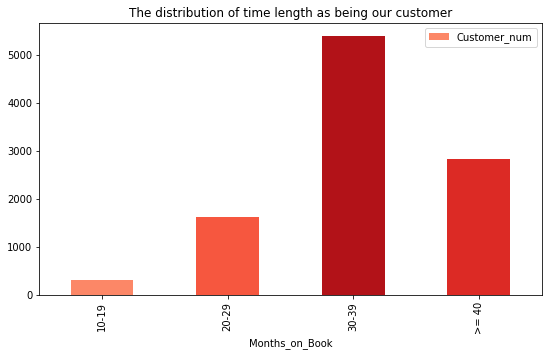

In [ ]:
Month_distribution.plot(title = 'The distribution of time length as being our customer',kind='bar', 
                           x='Months_on_Book', y='Customer_num',
                 color = ['#fc8767', '#f6573f', '#b21218', '#dc2a25'], figsize=(9, 5));

We divide the number of churned customers by the total number of customers group by the Months_on_book to see whether the time length as being our customer will affect the churn rate.



We can see the time lengh does affect the churn rate below 39 months, however, it seems to be less influential when it's longer 40 months.
Overall, shorter-term customers have higher tendency to churn.

In [ ]:
%%bigquery Time_impact --project=ba775-team-project
SELECT
CASE
      WHEN Months_on_Book>=10 AND Months_on_Book <20 then '10-19'
      WHEN Months_on_Book>=20 AND Months_on_Book <30 then '20-29'
      WHEN Months_on_Book>=30 AND Months_on_Book <40 then '30-39'
      ELSE '>= 40'
End as Months_on_Book,
SUM(CAST(Attrition_Flag = 'Attrited Customer' AS INT)) AS Churn_Customer,
COUNT(*) AS Total_Customer,
SUM(CAST(Attrition_Flag = 'Attrited Customer'AS INT))/COUNT(*)*100 AS Churn_Rate

FROM `ba775-team-project.bankchurners.bankchurners`
GROUP BY Months_on_Book
ORDER BY Months_on_Book

In [ ]:
Time_impact

,Months_on_Book,Churn_Customer,Total_Customer,Churn_Rate
0,10-19,43,309,13.915858
1,20-29,238,1611,14.773433
2,30-39,899,5391,16.675941
3,>= 40,447,2816,15.873580


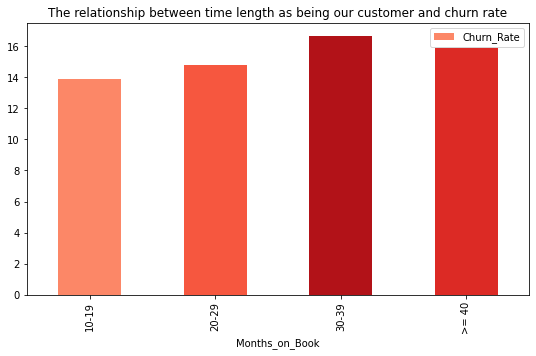

In [ ]:
Time_impact.plot(title = 'The relationship between time length as being our customer and churn rate', kind='bar', 
                 x='Months_on_Book', y='Churn_Rate', color = ['#fc8767', '#f6573f', '#b21218', '#dc2a25'],figsize=(9, 5));

### **Question 9: How does the number of other existing service affect churn rate?**

As seen in the table below, customers in the 1-2 product category have the highest churn rates (25.6% and 27.8%) whereas churn rates are observed to be lower for customers with higher number of products.

Furthermore, the correlation between total number of products and churn rates is -0.15, which shows a negative but weak correlation between the two variables. This means that customers with less products are more likely to churn.

In [ ]:
%%bigquery Relation_Impact --project=ba775-team-project
SELECT 
  Total_Relationship_Count AS Total_Products, 
  SUM(CAST(Attrition_Flag = 'Attrited Customer'AS INT)) AS Churned_Accounts,
  COUNT(*) AS Total_Accounts, 
  SUM(CAST(Attrition_Flag = 'Attrited Customer'AS INT))/COUNT(*)*100 AS Churn_Rate,
FROM `ba775-team-project.bankchurners.bankchurners`
GROUP BY Total_Relationship_Count
ORDER BY Total_Relationship_Count;

In [ ]:
Relation_Impact

,Total_Products,Churned_Accounts,Total_Accounts,Churn_Rate
0,1,233,910,25.604396
1,2,346,1243,27.835881
2,3,400,2305,17.353579
3,4,225,1912,11.767782
4,5,227,1891,12.004231
5,6,196,1866,10.503751


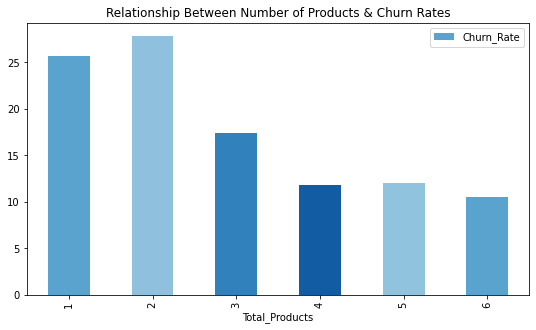

In [ ]:
Relation_Impact.plot(title = 'Relationship Between Number of Products & Churn Rates',kind='bar', x='Total_Products', y='Churn_Rate',color = ['#5ba3cf','#8fc1de','#3181bd','#125ca4','#8fc3de'], figsize=(9, 5));

In [ ]:
%%bigquery --project=ba775-team-project
SELECT ((SUM(Total_Relationship_Count * attrition_flag)
  -(SUM(Total_Relationship_Count) * SUM(attrition_flag)) / COUNT(*))) / (SQRT(SUM(Total_Relationship_Count * Total_Relationship_Count) 
  -(SUM(Total_Relationship_Count) * SUM (Total_Relationship_Count)) / COUNT(*) ) * SQRT(SUM(attrition_flag * attrition_flag)
  -(SUM(attrition_flag) * SUM(attrition_flag)) / COUNT(*))) AS corr
FROM
(SELECT 
  Total_Relationship_Count,
  CAST(Attrition_Flag = 'Attrited Customer' AS INT) AS attrition_flag
  FROM ba775-team-project.bankchurners.bankchurners)

,corr
0,-0.150005


### **Question 10: Can customer activity level help us identify customers who are more likely to churn?**

We divide the number of attrited customers by the total number of customers group by the total transcation amount to see whether the amount our customer spend will affect the churn rate.

We can see the customers with transaction amount below 4k tend to have a high churn rate. and customers with transcation amount between 8k to 12K have the highest churn rate. Moreover, customers with transcation amount above 12k tend to stuck with us.

In [ ]:
%%bigquery Total_Trans_Amt --project=ba775-team-project
/* transacation amount tendency */
SELECT SUM(CAST(Attrition_Flag = 'Attrited Customer'AS INT)) AS closed_account,
COUNT(*) AS total_account,SUM(CAST(Attrition_Flag = 'Attrited Customer'AS INT))/
COUNT(*)*100 AS Churn_rate,
CASE
      WHEN Total_Trans_Amt <4000 THEN '0-4000'
      WHEN Total_Trans_Amt <8000 THEN '4000-8000'
      WHEN Total_Trans_Amt <12000 THEN '8000-12000'
      WHEN Total_Trans_Amt <16000 THEN '12000-16000'
      ELSE '16000-20000'
End AS Total_Trans_Amt
    
FROM `ba775-team-project.bankchurners.bankchurners`
GROUP BY Total_Trans_Amt

In [ ]:
Total_Trans_Amt

,closed_account,total_account,Churn_rate,Total_Trans_Amt
0,1318,5287,24.929071,0-4000
1,156,3751,4.158891,4000-8000
2,153,343,44.606414,8000-12000
3,0,657,0.000000,12000-16000
4,0,89,0.000000,16000-20000


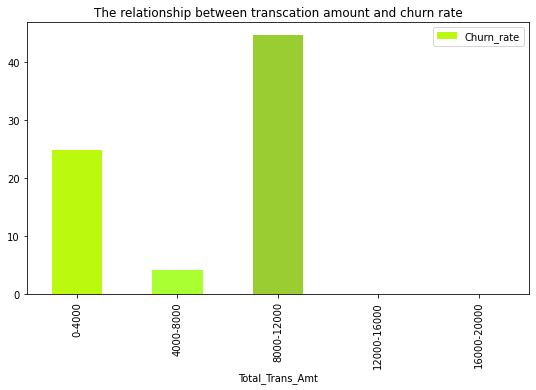

In [ ]:
Total_Trans_Amt.plot(title = 'The relationship between transcation amount and churn rate', kind='bar', 
                       x='Total_Trans_Amt', y='Churn_rate', 
                       color = ['#bbf90f','#aaff32','#9acd32','#ffff14','#ffff00'], figsize=(9, 5));

### **Question 11: How does revolving balance affect churn rate?**

We divide the number of churned customers by the total number of customers group by the total revolving balance to see whether the revolving balance will affect the churn rate.

We can see the revolving balance does affect churn rate. Customers with very low revolving balance tends to have a very high churn rate.

In [ ]:
%%bigquery Total_Revolving_Bal --project=ba775-team-project
/* revolving amount tendency */
SELECT SUM(CAST(Attrition_Flag = 'Attrited Customer'AS INT)) AS closed_account,
COUNT(*) AS total_account,SUM(CAST(Attrition_Flag = 'Attrited Customer'AS int))/
COUNT(*)*100 AS Churn_rate,
CASE
      WHEN Total_Revolving_Bal <500 THEN  '0-500'
      WHEN Total_Revolving_Bal <1000 THEN '0500-1000'
      WHEN Total_Revolving_Bal <1500 THEN '1000-1500'
      WHEN Total_Revolving_Bal <2000 THEN '1500-2000'
      ELSE '2000-2500'
End AS Total_Revolving_Bal
    
FROM `ba775-team-project.bankchurners.bankchurners`
GROUP BY Total_Revolving_Bal
ORDER BY Total_Revolving_Bal

In [ ]:
Total_Revolving_Bal

,closed_account,total_account,Churn_rate,Total_Revolving_Bal
0,998,2595,38.458574,0-500
1,163,1316,12.386018,0500-1000
2,103,2257,4.563580,1000-1500
3,108,2287,4.722344,1500-2000
4,255,1672,15.251196,2000-2500


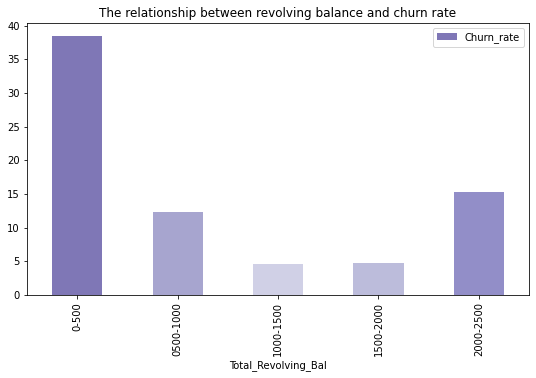

In [ ]:
Total_Revolving_Bal.plot(title = 'The relationship between revolving balance and churn rate', kind='bar', 
                       x='Total_Revolving_Bal', y='Churn_rate', 
                       color = ['#7f77b6','#a7a5cf','#d0d0e6','#bcbcdb','#928ec8'], figsize=(9, 5));

# **Correlation Analysis**

To find the important features affecting churn rate, we analyze correlations among all variables. This information will allow us to spot secondary indicators of higher churn rate. 

We start by constructing the dataframe.

In [ ]:
%%bigquery df --project=ba775-team-project
SELECT *
FROM `ba775-team-project.bankchurners.bankchurners`;

We select out the relevant features by dropping Naive Bayes Classifier columns and setting CLIENTNUM as index to make correlation analysis meaningful.

In [ ]:
df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
                      , 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], inplace = True)

In [ ]:
df.set_index('CLIENTNUM', inplace=True)

We separate features into numerical and categorical.

In [ ]:
df_categorical = df.loc[:,df.dtypes == np.object]
print('Categorical Columns are : {}'.format(df_categorical.columns))

df_numerical = df.loc[:,df.dtypes != np.object]
print('Numerical Columns are : {}'.format(df_numerical.columns))

Categorical Columns are : Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')
Numerical Columns are : Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


We produce the heatmap for all numerical variables to study their correlation.

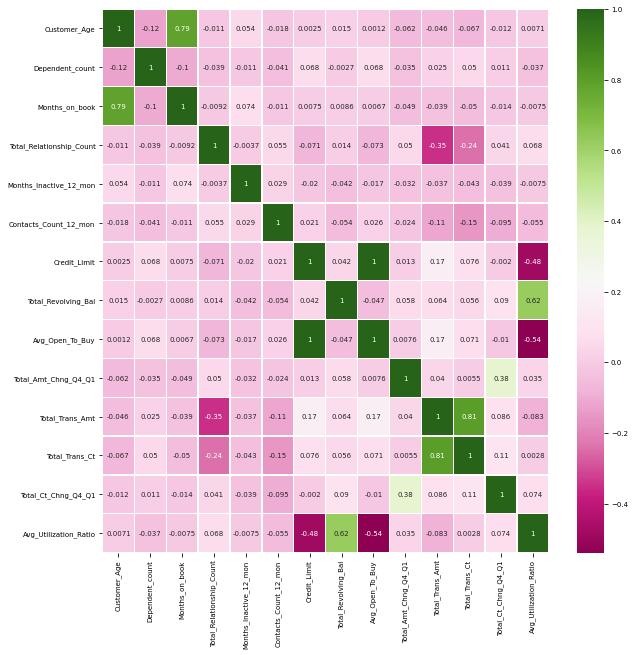

In [ ]:
corr = df_numerical.corr()
plt.figure(figsize=[10,10])
plt.rcParams['font.size']=7
sns.heatmap(corr, cmap='PiYG', annot= True, linewidths=0.3 );

The blocks in green show the features with high correlation. Total_Revolving_Bal has high correlation with Avg_Utillization_Ratio. Months_on_book has high correlation with Customer_Age. Credit_Limit has perfect correlation with Avg_Open_To_Buy. 

From all the scatter plots below, we can also observe that the correlations between the avg utilization ratio, Credit imit and avg open to buy are relatively strong. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


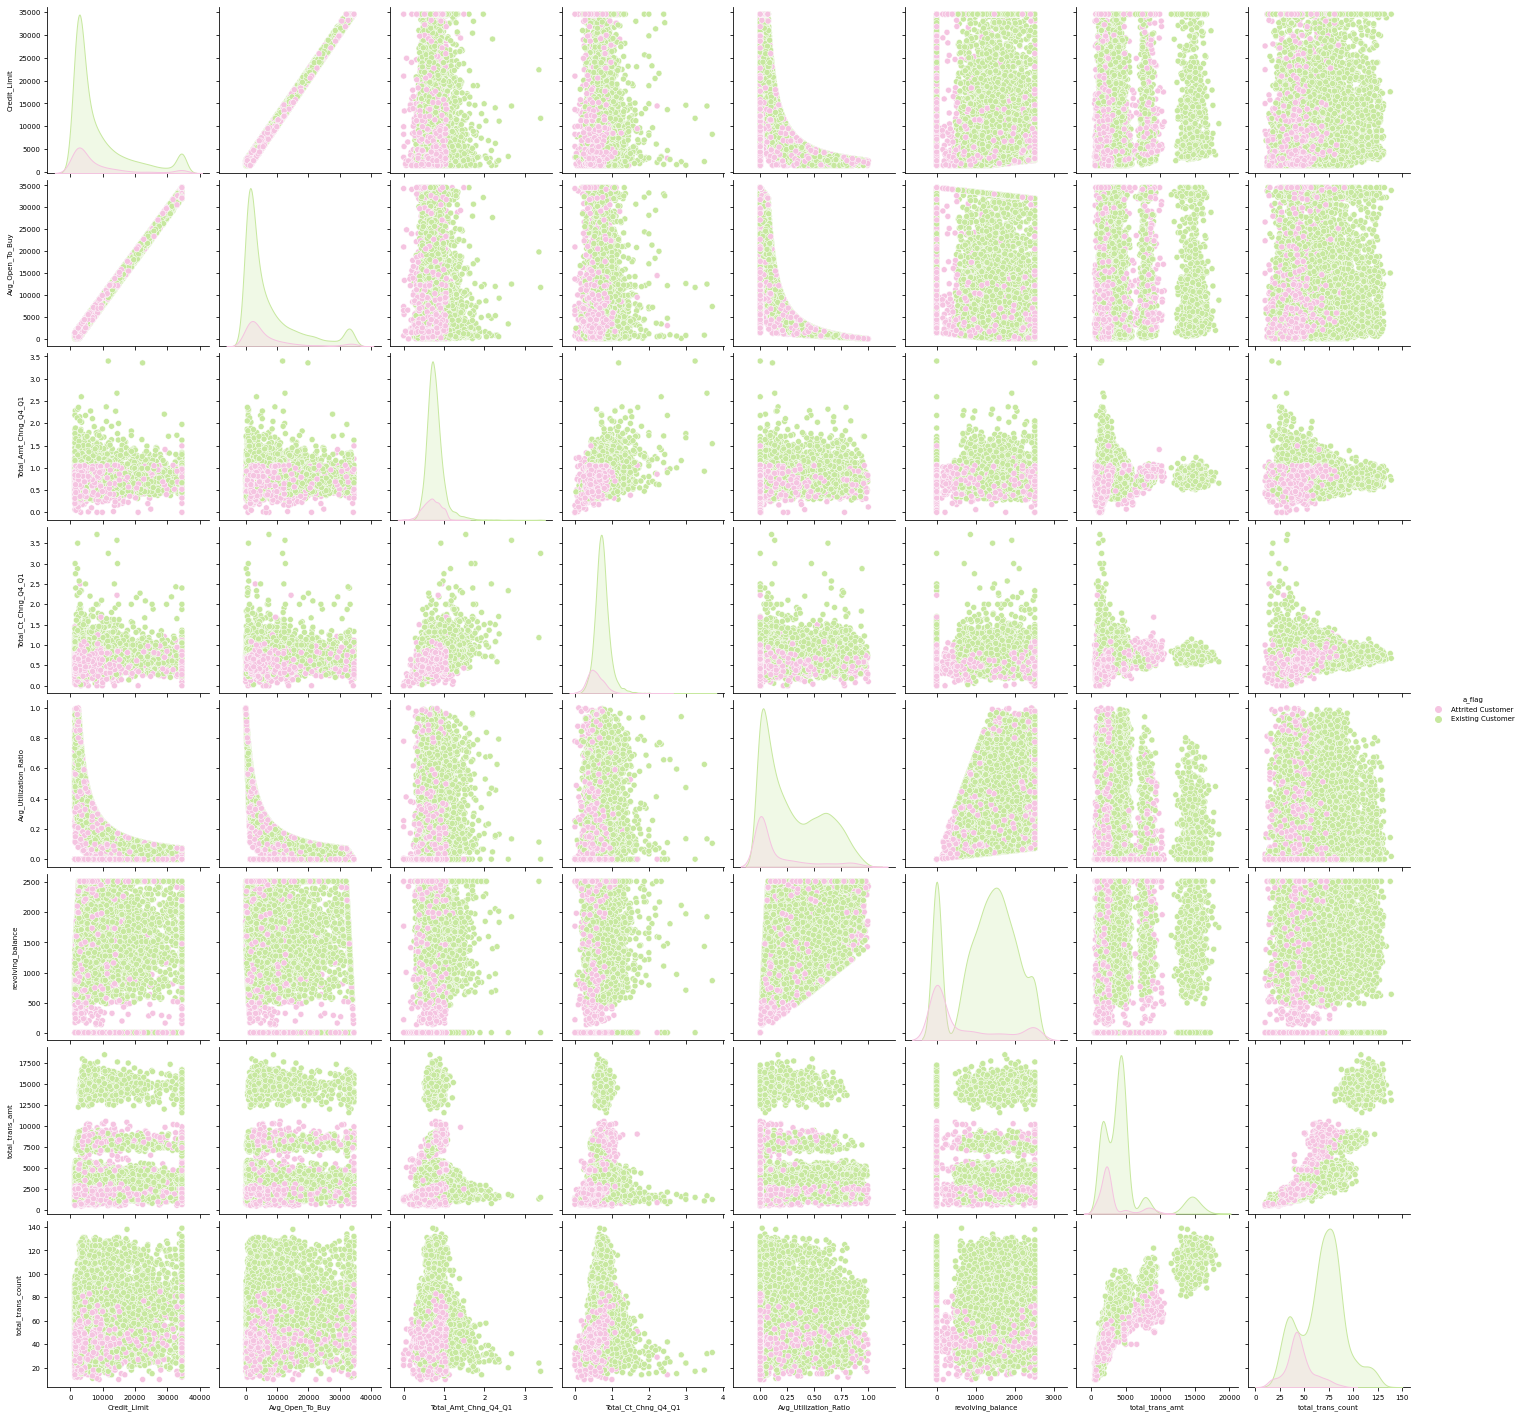

In [ ]:
df_num_float = df.select_dtypes(include = ['float64']) 
df_num_float['a_flag'],df_num_float['revolving_balance'], df_num_float['total_trans_amt'], df_num_float['total_trans_count'] = df['Attrition_Flag'], df['Total_Revolving_Bal'], df['Total_Trans_Amt'], df['Total_Trans_Ct']
sns.pairplot(df_num_float, hue='a_flag', palette='PiYG');

While the correlation analysis heat map shows the relationship between features, it does not allow us to directly analyze how these features are related to churn rate. Random Forest allows us to examine the features in regards to our target variable churn rate.

# **Machine Learning**

## **Random Forest**

Random forest helps us to classify customers into two categories: churning customer or not. The output of the random forest is the class selected by most trees by considering all features.

We start by converting coloumns into appropriate datatype. 

In [ ]:
cat_types = ['bool','object','category']
df = df.copy()
df[df.select_dtypes(cat_types).columns] = df.select_dtypes(cat_types).apply(lambda x: x.astype('category'))

We set up y, the target value to be attrition_flag. We set up x as all coloumns except the target value.

In [ ]:
codes = {'Existing Customer':0, 'Attrited Customer':1}
df['Attrition_Flag'] = df['Attrition_Flag'].map(codes)

y = df['Attrition_Flag']
X = df.drop('Attrition_Flag',errors='ignore',axis=1)

Label Encoding for ordinal variables.

In [ ]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

features_to_encode = X.select_dtypes('category').columns.to_list()
for feature in features_to_encode:
    X = encode_and_bind(X, feature)

Split the dataset into 80% of training and 20% of testing.

In [ ]:
X_train80, X_test20, y_train80, y_test20 = train_test_split(X, y, test_size=0.2, random_state = 0, shuffle= True,stratify = y)

In [ ]:
print(y_train80.value_counts())
print(y_test20.value_counts())

0    6799
1    1302
Name: Attrition_Flag, dtype: int64
0    1701
1     325
Name: Attrition_Flag, dtype: int64


Train and test the data using random forest classifier model. It shows the accuracy of 95.61%.

In [ ]:
RFC = RandomForestClassifier(random_state = 0)
RFC.fit(X_train80,y_train80)
print("Accuracy: %.2f%%" % ((RFC.score(X_test20,y_test20))*100.0))

Accuracy: 95.61%


# **Report Summary**

Through churn analysis, we found that customers in middle age, with doctorate degrees, holding platinum (highest category) cards, having extremely low or high income, and having extremely high or low credit limit have high tendency to churn. The manager should spend more efforts on customers retention for those with these attributes. In addition, customers with increased engagement with sales representative, customers with few other bank products, and customers with low revolving balance tend to have high churn rate. We recommend the manager to provide promotion bundles to sell more bank products to increase loyalty, prioritize customers with low balance, and optimize customer service efficiency and quality to reduce churn rate.



# **Appendix**


1.	What is the overall churn rate of our customer?
2.	What is our user portrait like in terms of age, gender, educational level and income?
3.	What age group of customers has a higher tendency to churn?
4.	Which education category of customers has a higher tendency to churn?
5.	Which income category of customers has a higher tendency to churn?
6.	Which marriage type of customers has a higher tendency to churn?
7.	How does dependent count influence churn rate?
8.	Which card type of customers has a higher tendency to churn?
9.	How does credit limit affect churn rate?
10.	How does the number of contacts by sales representative in the past 12 month affect churn rate?
11.	How does time length as being our customer affect churn rate?
12.	How does the number of other existing service affect churn rate?
13.	How does transaction amount affect churn rate?
14.	How does revolving balance affect churn rate?
15. What are the characteristics of people with high revolving balance. How about the ones with a low balance?
